In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import re
import pandas as pd
import ast
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils import extract_from_description
from utils import extract_from_title

In [27]:
df = pd.read_csv("/Users/alessandromolinarroet/Desktop/ALL_JOB_DATA.csv")
df = df[1000:1500]

In [ ]:
skill_path = "./lists/skills.txt"
field_path = "./lists/fields.txt"
model_name = "TechWolf/JobBERT-v2" # What is best model? Zero shot classification okay even if not really sentences?

extract_from_description(df,skill_path)
extract_from_title(df,field_path,treshold=0.6,model_name=model_name)
df.to_csv("jobs.csv", index=False)

Processing job titles: 100%|██████████| 500/500 [00:24<00:00, 20.64it/s]

FIELDS AND LEVELS EXTRACTED SUCCESFULLY 



TypeError: 'int' object is not iterable

In [36]:
for index, row in df.iterrows():
    print(row["Job Title"])
    print(row["Field"])
    print()

Performance Marketing Manager
Digital Marketing

Senior Fullstack Developer
Software Engineering

Consultant Projects & Solutions
Consultant

Head of Engineering / CTO
Operations Management

Financial Controller
Finance

Senior Marketing Manager
Marketing

Senior Creative Strategist
Brand Management

Senior Creative Strategist
Brand Management

System Integration Engineer
Other

Werkzeugmechaniker
Other

Junior-Bioinformatiker/in
Other

Data Scientist
Data Scientist

Senior Manager, Influencer Marketing
Brand Management

2nd Level Support
Customer Support

VR-Control Experte für Controlling und Risikosteuerung
Other

Head of Brand & Community Management
Brand Management

Working Student Talent Acquisition & Recruiting
Talent Acquisition

Recruiter
Talent Acquisition

Werkstudent:IN
Other

Unterstützung Qualitätssicherung
Other

Founding Marketer in B2B SaaS Startup
Content Marketing

Accountant/Buchhalter*in in Berlin
Accounting

Quality Manager
Quality Control

Für Menschen, die gerne

In [83]:
import matplotlib.pyplot as plt
import numpy as np

jobs_per_field = df['Field'].value_counts()
top5 = jobs_per_field.head(3)
colors = plt.cm.tab10(np.linspace(0, 1, 3))

plt.figure(figsize=(8,5))
for i, (field, count) in enumerate(top5.items()):
    plt.bar(i, count, color=colors[i], label=field)
plt.title("Top 3 requested Jobs")

plt.xticks(range(3), [f"{i+1}" for i in range(3)])

plt.legend(
    title="Fields",
    fontsize=8,          
    title_fontsize=9,   
    loc="upper right",  
    frameon=True
)

plt.tight_layout()
plt.show()


KeyError: 'Field'

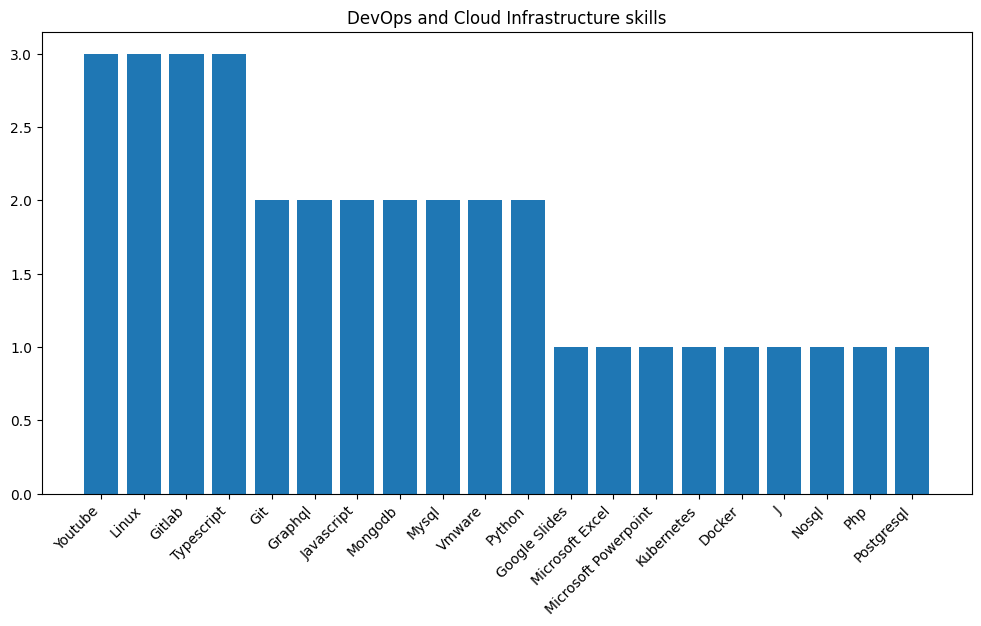

In [44]:
selected_field = "Other" 
top_n = 20

group = df[df['Field'] == selected_field]
all_skills = [skill for skills_list in group['Skills'] for skill in skills_list]
skill_counter = {}
for skill in all_skills:
    if skill in skill_counter:
        skill_counter[skill] += 1
    else:
        skill_counter[skill] = 1
        
sorted_skills = sorted(skill_counter.items(), key=lambda x: x[1], reverse=True)
skill_names = [s[0] for s in sorted_skills[:top_n]]
skill_counts = [s[1] for s in sorted_skills[:top_n]]

plt.figure(figsize=(12,6))
plt.bar(skill_names, skill_counts)
plt.xticks(rotation=45, ha='right')
plt.title("DevOps and Cloud Infrastructure skills")
plt.show()


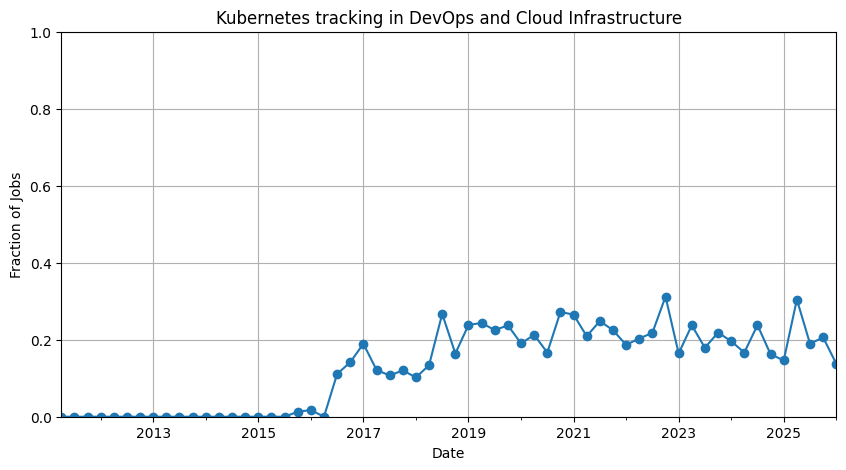

In [92]:
selected_field = "DevOps and Cloud Infrastructure"
selected_skill = "Kubernetes"  

df['Date'] = pd.to_datetime(df['Date'])
field_df = df[df['Field'] == selected_field].copy()

field_df['has_skill'] = field_df['skills'].apply(lambda x: selected_skill in x)
field_df = field_df.set_index('Date')

total_jobs = field_df['has_skill'].resample('3ME').count()
skill_jobs = field_df['has_skill'].resample('3ME').sum()

skill_fraction = skill_jobs / total_jobs

plt.figure(figsize=(10,5))
skill_fraction.plot(marker='o')
plt.xlabel("Date")
plt.ylabel("Fraction of Jobs")
plt.title(f"{selected_skill} tracking in DevOps and Cloud Infrastructure")
plt.ylim(0,1)
plt.grid(True)
plt.show()